In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zot_df = pd.read_csv('zot_clean.csv')

# Convert the date columns to datetime objects
date_columns = ["Date", "Date Added", "Date Modified"]
for col in date_columns:
    zot_df[col] = pd.to_datetime(zot_df[col], errors='coerce')

zot_df["Publication Year"] = zot_df["Publication Year"].astype("Int64")
zot_df["Hearts"] = zot_df["Hearts"].astype("Int64")

zot_df["Manual Tags"] = zot_df["Manual Tags"].fillna("").str.split(";").apply(lambda tags: [tag.strip() for tag in tags])

zot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Type          719 non-null    object        
 1   Publication Year   646 non-null    Int64         
 2   Author             654 non-null    object        
 3   Title              719 non-null    object        
 4   Publication Title  279 non-null    object        
 5   DOI                215 non-null    object        
 6   Url                651 non-null    object        
 7   Abstract Note      670 non-null    object        
 8   Date               53 non-null     datetime64[ns]
 9   Date Added         719 non-null    datetime64[ns]
 10  Date Modified      719 non-null    datetime64[ns]
 11  Volume             205 non-null    float64       
 12  Publisher          325 non-null    object        
 13  Language           584 non-null    object        
 14  Library Ca

In [10]:
zot_df.head()

,Item Type,Publication Year,Author,Title,Publication Title,DOI,Url,Abstract Note,Date,Date Added,Date Modified,Volume,Publisher,Language,Library Catalog,Notes,Manual Tags,Hearts
0,report,2009,"Settles, Burr",Active Learning Literature Survey,NaN,NaN,https://minds.wisconsin.edu/handle/1793/60660,The key idea behind active learning is that a ...,2009-01-01,2022-09-17 13:55:35,2024-07-28 20:21:19,NaN,University of Wisconsin-Madison Department of ...,en,minds.wisconsin.edu,NaN,"[active learning, machine learning]",1.0
1,preprint,2020,"Baier, Lucas; Kellner, Vincent; Kühl, Niklas; ...",Switching Scheme: A Novel Approach for Handlin...,NaN,NaN,http://arxiv.org/abs/2011.02738,Machine learning models nowadays play a crucia...,NaT,2022-09-17 15:26:45,2024-07-28 20:21:29,NaN,arXiv,en,arXiv.org,Comment: 54th Annual Hawaii International Conf...,"[machine learning, machine learning - concept...",1.0
2,preprint,2022,"Mayaki, Mansour Zoubeirou A.; Riveill, Michel",Autoregressive based Drift Detection Method,NaN,NaN,http://arxiv.org/abs/2203.04769,"In the classic machine learning framework, mod...",NaT,2022-09-17 15:33:30,2024-07-28 20:21:32,NaN,arXiv,en,arXiv.org,NaN,"[machine learning, machine learning - concept...",1.0
3,journalArticle,2009,"Sabelfeld, K.; Mozartova, N.",Sparsified Randomization Algorithms for large ...,Monte Carlo Methods and Applications,10.1515/MCMA.2009.015,https://www.degruyter.com/document/doi/10.1515...,Sparsiﬁed Randomization Monte Carlo (SRMC) alg...,NaT,2022-09-17 17:35:35,2024-07-28 20:30:28,15.0,NaN,en,DOI.org (Crossref),"<div data-schema-version=""8""><p>Inspiration fo...","[monte carlo, linear systems, random linear ...",3.0
4,journalArticle,2017,"Benzi, Michele; Evans, Thomas M.; Hamilton, St...",Analysis of Monte Carlo accelerated iterative ...,Numerical Linear Algebra with Applications,10.1002/nla.2088,https://onlinelibrary.wiley.com/doi/10.1002/nl...,We consider hybrid deterministic-stochastic it...,NaT,2022-09-17 17:35:37,2024-07-28 20:24:15,24.0,NaN,en,DOI.org (Crossref),NaN,"[monte carlo, linear systems, random linear ...",1.0


<Axes: >

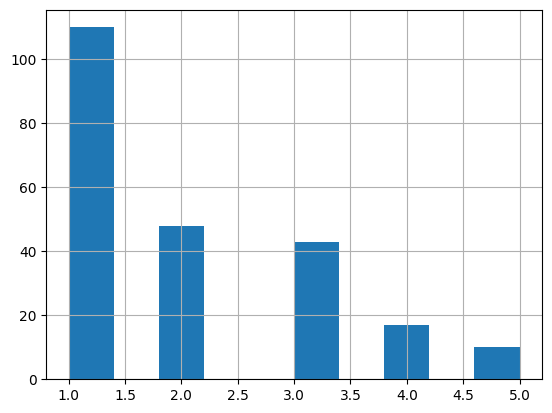

In [13]:
zot_df["Hearts"].hist()

In [42]:
import pandas as pd

def visualize_date(df, date_column):
	"""
	Visualizes the distribution of dates in the specified column of the DataFrame.
	
	Parameters:
	df (pd.DataFrame): The DataFrame containing the date column.
	date_column (str): The name of the column containing date values.
	"""
	# Ensure the date column is in datetime format
	df[date_column] = pd.to_datetime(df[date_column])
	
	# Plot the data
	plt.figure(figsize=(10, 6))
	plt.hist(df[date_column], bins=30, edgecolor='k', alpha=0.7)
	plt.title('Distribution of ' + date_column)
	plt.xlabel(date_column)
	plt.ylabel('Frequency')
	plt.xticks(rotation=45)
	plt.show()


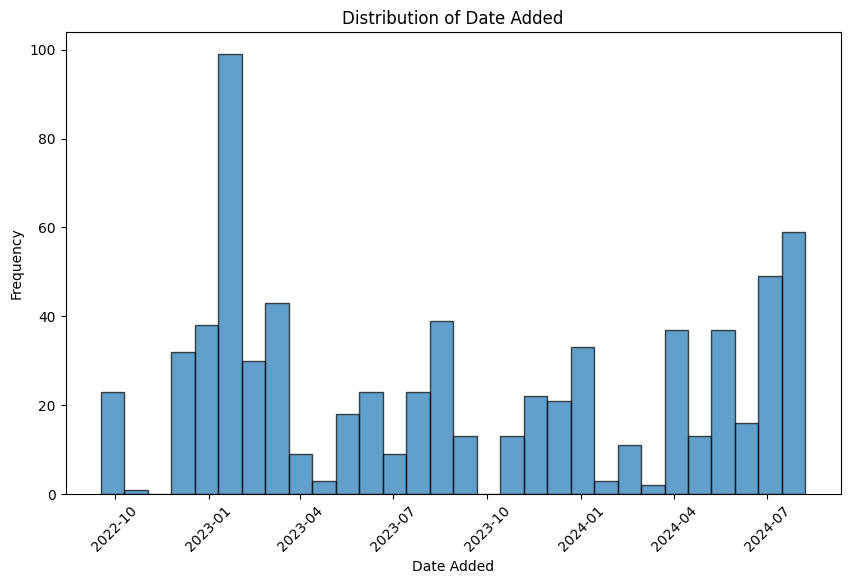

In [43]:
visualize_date(zot_df, "Date Added")

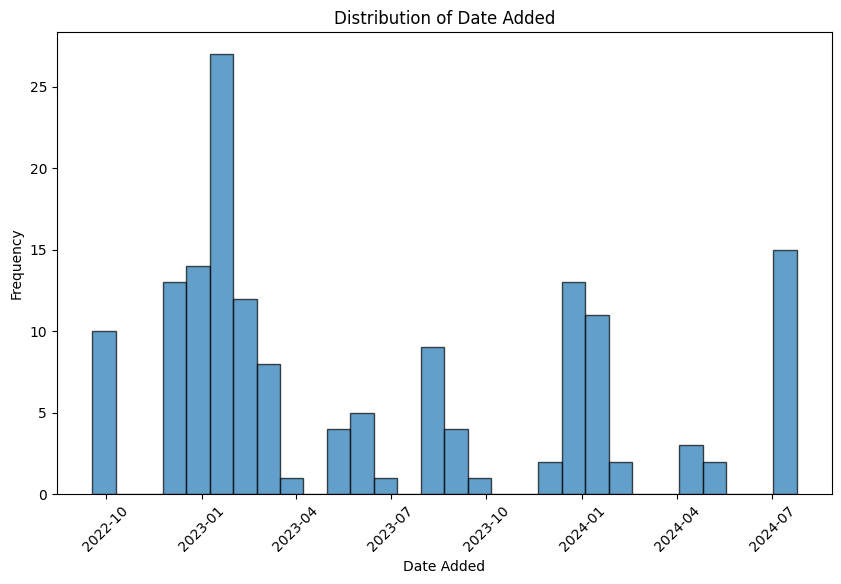

In [39]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "monte carlo" in tags)].copy(), "Date Added")

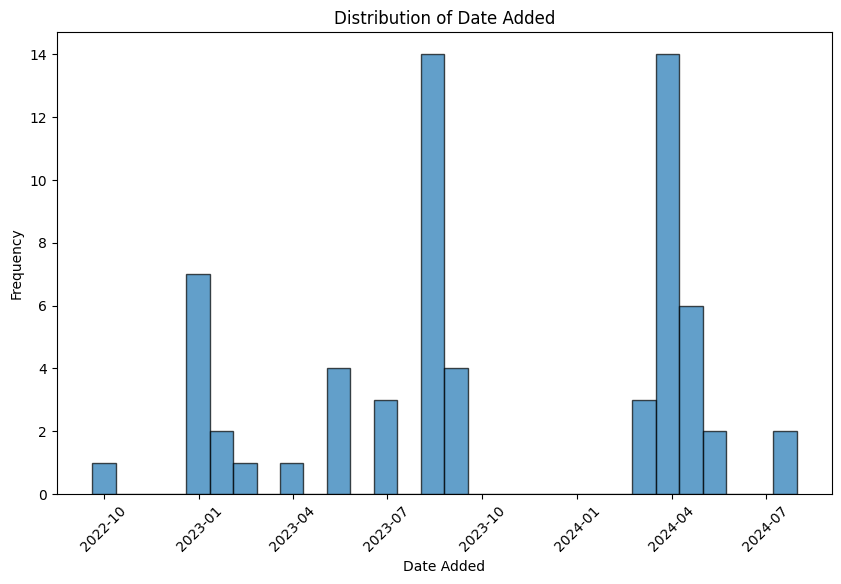

In [38]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "deep learning" in tags)].copy(), "Date Added")

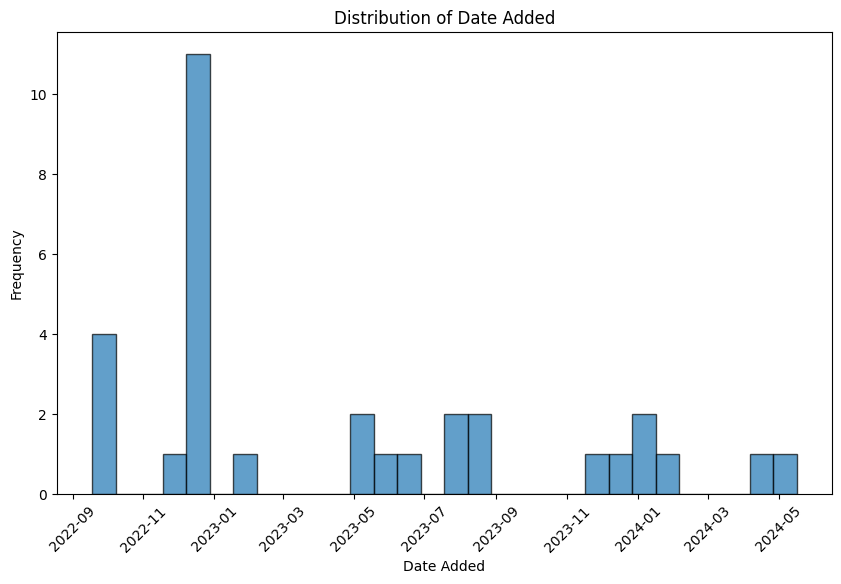

In [40]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "walk on spheres" in tags)].copy(), "Date Added")

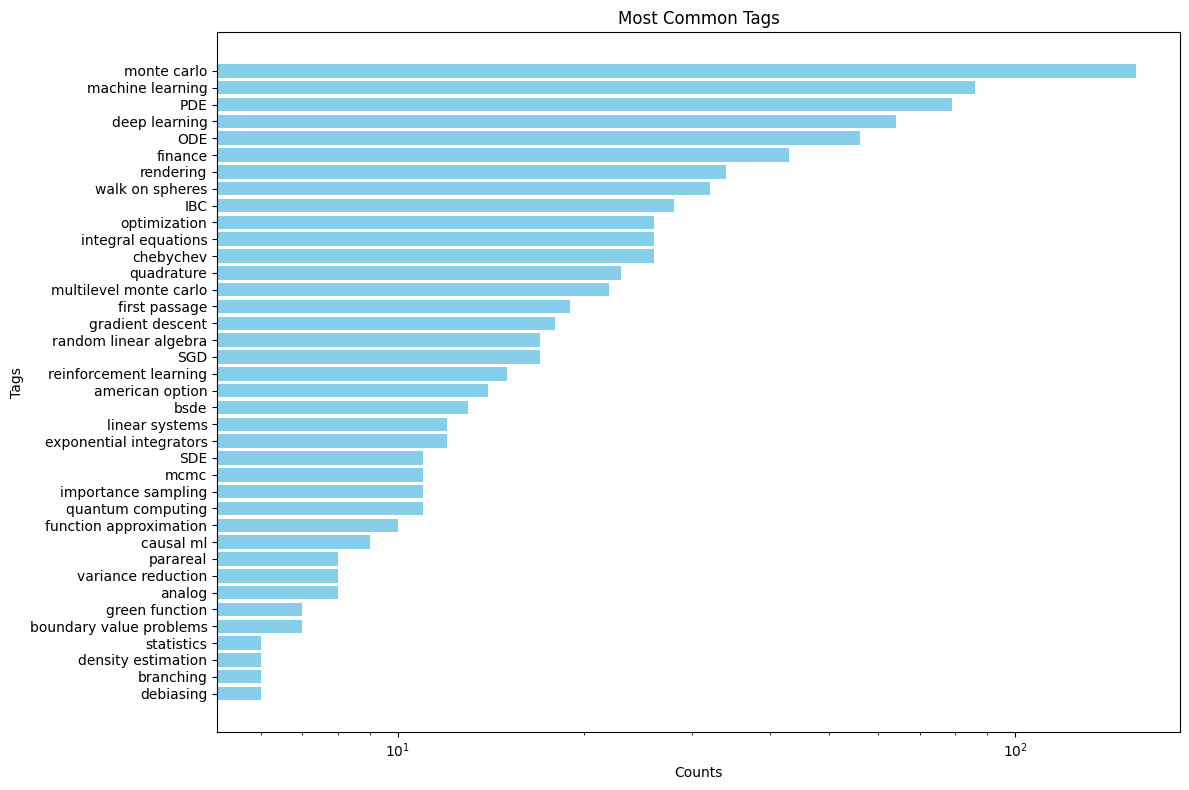

In [64]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of tags
all_tags = [tag for sublist in zot_df["Manual Tags"] for tag in sublist if tag != ""]

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

total_tags = sum(tag_counts.values())

# Filter out tags that are less than 0.5% of the total
filtered_tag_counts = {tag: count for tag, count in tag_counts.items() if count / total_tags >= 0.005}

# Sort the tags by frequency
sorted_tag_counts = dict(sorted(filtered_tag_counts.items(), key=lambda item: item[1], reverse=True))

# Create a horizontal bar plot with most common tags on top
plt.figure(figsize=(12, 8))
plt.barh(list(sorted_tag_counts.keys())[::-1], list(sorted_tag_counts.values())[::-1], color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Tags')
plt.title('Most Common Tags')
plt.xscale('log')  
plt.tight_layout()
plt.show()